In [27]:
using LinearAlgebra, CSV, DataFrames ,Polynomials, Plots, Images


#### Zadanie 1 (1pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

In [28]:
n = 1000
x=rand(n)
A=rand(n, n)
b = A*x;

In [29]:
x_inv = inv(A)*b;

In [30]:
x_lu = A\b;

In [31]:
A_fac = factorize(A)
x_fac = A_fac\b;

In [32]:
# calculate distances
dist_inv = norm(x - x_inv)
dist_lu = norm(x - x_lu)
dist_fac = norm(x- x_fac)

println("Error of inv: ", dist_inv)
println("Error of backslash: ", dist_lu)
println("Error of factorization: ", dist_fac)

Error of inv: 2.154497904301093e-11
Error of backslash: 1.7058091935259334e-11
Error of factorization: 1.7058091935259334e-11


#### Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

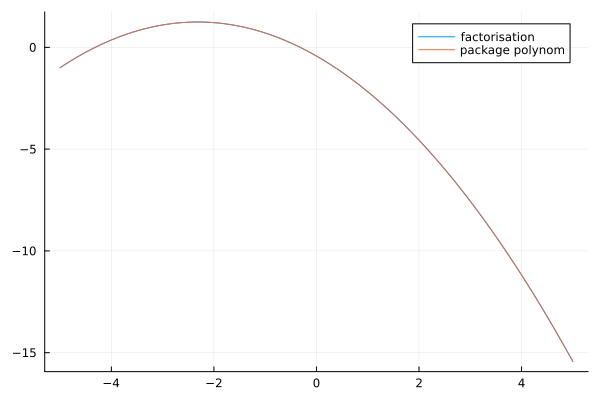

In [33]:
data = CSV.read("../Mownit_lab6/ecg_data.csv", DataFrame)
x = data.signalN
y = data.signalV

A=zeros(73,3) 
A[:,1]=x.^2
A[:,2]=x
A[:,3]=ones(73)

AF=factorize(A)
factor = Polynomial(AF.R\((Transpose(AF.Q)*y)[1:3]))
ideal = fit(x, y, 2)
xs = -5:5

plot(factor,extrema(xs)...,label="factorisation")
plot!(ideal,extrema(xs)...,label="package polynom")



#### Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 

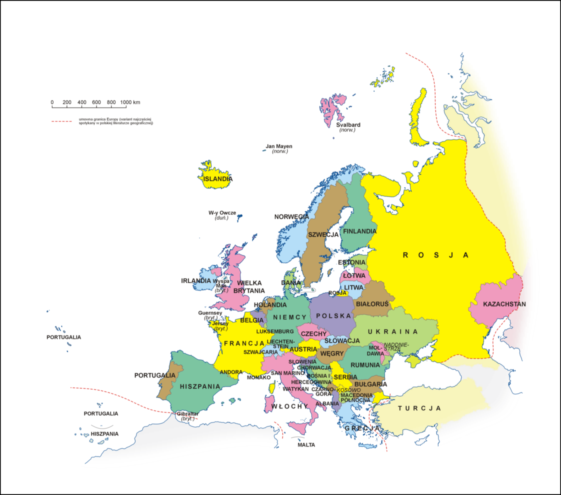

In [34]:
# Wczytanie obrazu
img = load("image.png")
display(img)

In [35]:
function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
end

channels = channelview(img)
vals = (10, 20, 50, 100)
svdfactors = svd.(eachslice(channels; dims=1));


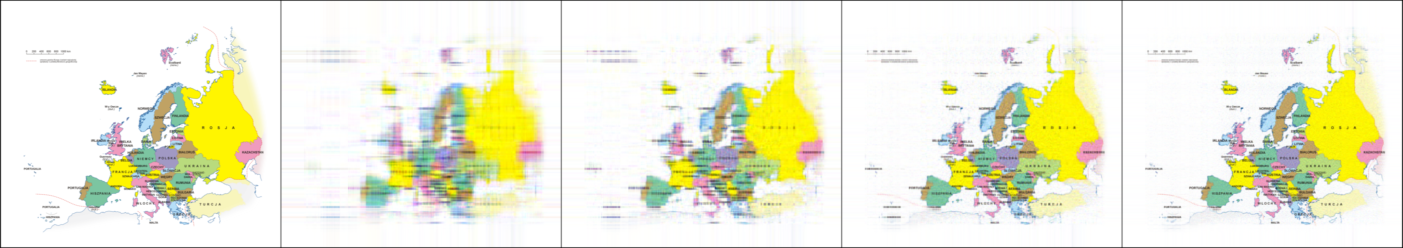

In [36]:
imgs = map(vals) do k
    colorview(RGB, rank_approx.(svdfactors, k)...)
end

converted_names = ["converted$(k).png" for k in vals]

for (i, converted_img) in enumerate(imgs)
    save(converted_names[i], converted_img)
end

mosaicview(img, imgs...; nrow=1, npad=10)